In [ ]:
!pip install vk

  Created wheel for vk: filename=vk-2.0.2-py3-none-any.whl size=8275 sha256=2a907c779f7b3f9887ed4379b956c183d8efd183243afc271793cf6f774b2ee2
  Stored in directory: /root/.cache/pip/wheels/7b/d0/2b/d07628ebced43577b8001d0c9d716f972059535bbaadb1eb9d
Successfully built vk


In [ ]:
import requests
import vk, os, time, math, re
import pandas as pd

In [ ]:
access_token = "9ea881dc9ea881dc9ea881dc509ede694199ea89ea881dcfef817201ca788e263cfd0ed"
api_version = '5.89'

In [ ]:

pd.options.display.max_columns = 999

login = ''
password = ''
vk_id = ''
session = vk.AuthSession(app_id=vk_id, user_login=login, user_password=password)
vk_api = vk.API(session)



In [ ]:
def get_members(groupid):
    filds = 'sex, bdate, city, country, has_mobile, contacts'
    first = vk_api.groups.getMembers(group_id=groupid, fields = fields, v=5.92, access_token=access_token)  # Первое выполнение метода
    data = first["items"]  # Присваиваем переменной первую тысячу id'шников
    count = first["count"] // 1000  # Присваиваем переменной количество тысяч участников
    # С каждым проходом цикла смещение offset увеличивается на тысячу
    # и еще тысяча id'шников добавляется к нашему списку.
    for i in range(1, count+1):
        data = data + vk_api.groups.getMembers(group_id=groupid, fields = fields, v=5.92, offset=i*1000,  access_token=access_token)["items"]
    data = pd.json_normalize(data)
    return data

In [ ]:
groupid = 'permhsecouncil'
groupid2 = 'yurhseperm'

df = get_members(groupid)

In [ ]:
df

,first_name,id,last_name,can_access_closed,is_closed,sex,has_mobile,city.id,city.title,country.title,country.id,bdate,mobile_phone,home_phone,deactivated
0,Dinara,681368,Gagarina,True,False,1,1.0,110.0,Perm,Russia,1.0,NaN,NaN,NaN,NaN
1,Georgy,693390,Fedosov,True,False,2,1.0,95.0,Nizhny Novgorod,Russia,1.0,23.12.1989,NaN,NaN,NaN
2,Viktor,770885,Vorobyov,True,False,2,1.0,NaN,NaN,Russia,1.0,19.6,NaN,NaN,NaN
3,Petr,935498,Moiseev,True,False,2,1.0,99.0,Novosibirsk,Russia,1.0,NaN,NaN,NaN,NaN
4,Yan,1213074,Mazitov,False,True,2,1.0,110.0,Perm,Russia,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,Irina,626653214,Vays,True,False,1,1.0,110.0,Perm,Russia,1.0,25.4.1991,,,NaN
1009,Imashi,660785283,Perera,True,False,1,1.0,1.0,Moscow,Russia,1.0,5.1.1999,,,NaN
1010,Samandar,666148709,Numonov,True,False,2,1.0,NaN,NaN,NaN,NaN,24.8.2003,,,NaN
1011,Dolly,670319967,Fam,False,True,1,1.0,NaN,NaN,Russia,1.0,NaN,NaN,NaN,NaN


In [ ]:
df1 = get_members(groupid2)
df1

,first_name,id,last_name,deactivated,sex,can_access_closed,is_closed,bdate,has_mobile,city.id,city.title,country.title,country.id,home_phone,mobile_phone
0,DELETED,1517923,,deleted,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Dmitry,1846106,Nosov,NaN,2,True,False,8.11,1.0,110.0,Perm,Russia,1.0,NaN,NaN
2,Gleb,2073161,Krasilschikov,NaN,2,True,False,12.8,1.0,NaN,NaN,Russia,1.0,NaN,NaN
3,Natalya,2762138,Lavochkina,NaN,1,True,False,16.12,1.0,110.0,Perm,Russia,1.0,NaN,NaN
4,Anna,2827093,Groysberg,NaN,1,False,True,21.5,1.0,110.0,Perm,Russia,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,Luybov,505347558,Luybov,NaN,1,False,True,10.8.1975,1.0,NaN,NaN,NaN,NaN,NaN,NaN
310,Ekaterina,540652852,Kharkevich,NaN,1,False,True,1.1.2002,1.0,NaN,NaN,Russia,1.0,NaN,NaN
311,Lawyer,604235345,Human-Rights,NaN,2,True,False,3.10.1977,1.0,NaN,NaN,NaN,NaN,,
312,Vafa,605642824,Akhmedova,NaN,1,False,True,10.4.2002,1.0,NaN,NaN,Russia,1.0,NaN,NaN


In [ ]:
df1 = df2

In [ ]:
import matplotlib.pyplot as plt

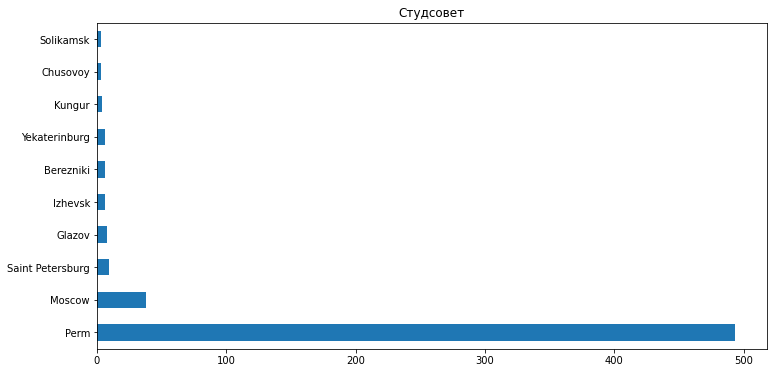

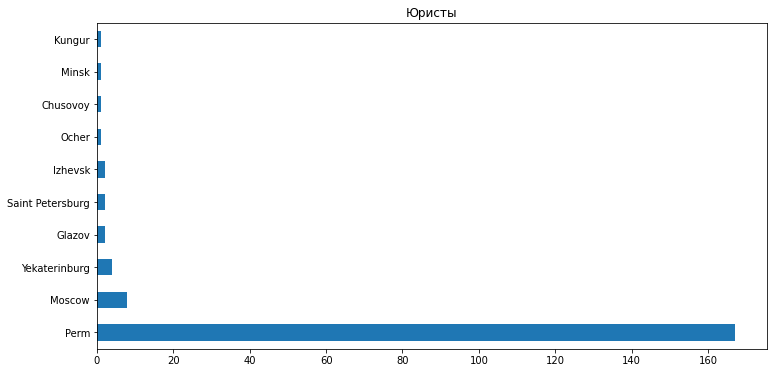

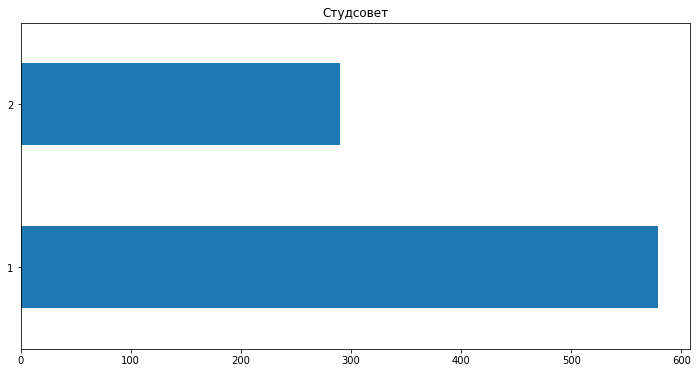

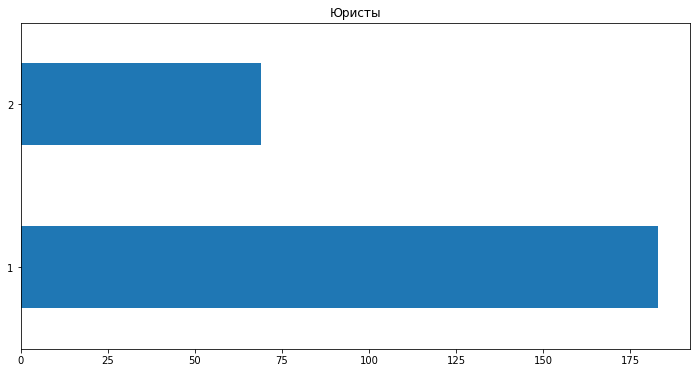

Города:
Perm                493
Moscow               38
Saint Petersburg      9
Glazov                8
Izhevsk               6
Berezniki             6
Yekaterinburg         6
Kungur                4
Chusovoy              3
Solikamsk             3
Name: city.title, dtype: int64
Perm                167
Moscow                8
Yekaterinburg         4
Glazov                2
Saint Petersburg      2
Izhevsk               2
Ocher                 1
Chusovoy              1
Minsk                 1
Kungur                1
Name: city.title, dtype: int64
Пол:
1    579
2    290
Name: sex, dtype: int64
1    183
2     69
Name: sex, dtype: int64


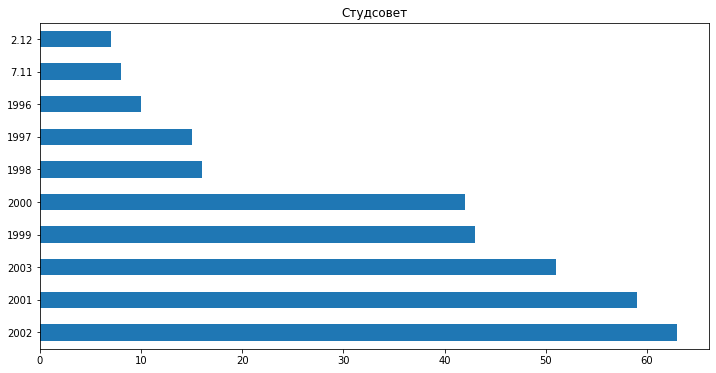

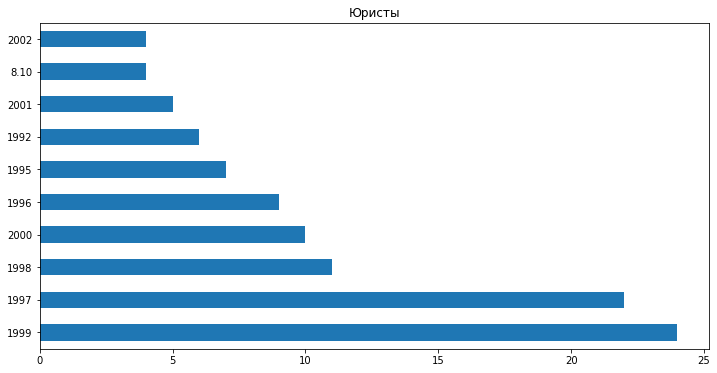

Год рождения:
2002    63
2001    59
2003    51
1999    43
2000    42
1998    16
1997    15
1996    10
7.11     8
2.12     7
Name: year, dtype: int64
1999    24
1997    22
1998    11
2000    10
1996     9
1995     7
1992     6
2001     5
8.10     4
2002     4
Name: year, dtype: int64
Кол-во пересечений:
51


In [ ]:
plt.title('Студсовет')
df['city.title'].value_counts()[:10].plot(kind='barh', figsize=(12, 6));
plt.show()

plt.title('Юристы')
df1['city.title'].value_counts()[:10].plot(kind='barh', figsize=(12, 6));

plt.show()

print('Города:')
print(df['city.title'].value_counts()[:10])
print(df1['city.title'].value_counts()[:10])
print('Пол:')
print(df['sex'].value_counts())
print(df1['sex'].value_counts())



In [ ]:
import numpy as np

In [ ]:
df['year']

0        NaN
1       1989
2       19.6
3        NaN
4        NaN
        ... 
1008    1991
1009    1999
1010    2003
1011     NaN
1012    2003
Name: year, Length: 1013, dtype: object

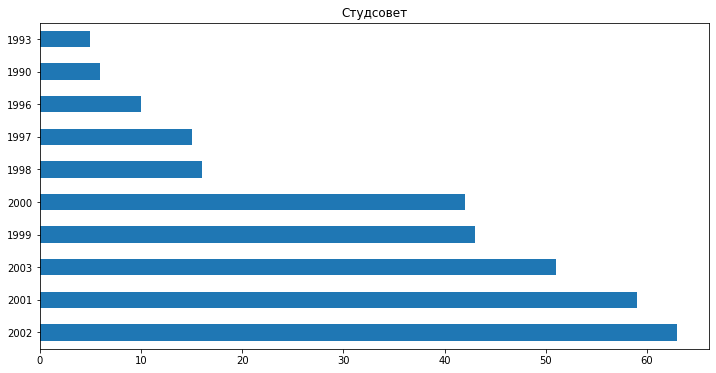

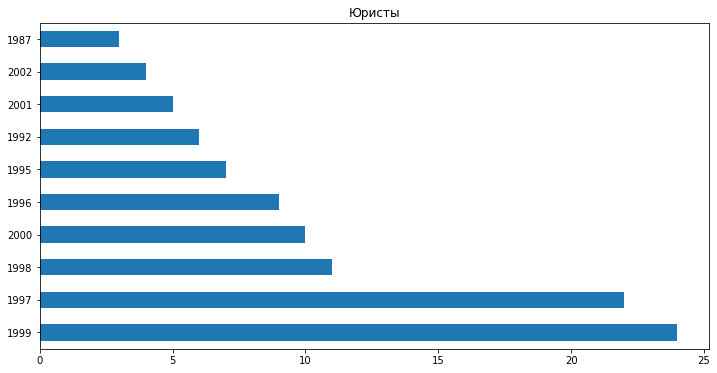

Год рождения:
2002    63
2001    59
2003    51
1999    43
2000    42
1998    16
1997    15
1996    10
1990     6
1993     5
Name: year, dtype: int64
1999    24
1997    22
1998    11
2000    10
1996     9
1995     7
1992     6
2001     5
2002     4
1987     3
Name: year, dtype: int64
Кол-во пересечений:
59


In [ ]:
df['year'] = df['bdate'].str.strip().str[-4:]
df['year'] = df['year'].apply(lambda x: None if '.' in str(x) else x)

df1['year'] = df1['bdate'].str.strip().str[-4:]
df1['year'] = df1['year'].apply(lambda x: None if '.' in str(x) else x)


plt.title('Студсовет')
df.year.value_counts()[:10].plot(kind='barh', figsize=(12, 6))
plt.show()

plt.title('Юристы')
df1.year.value_counts()[:10].plot(kind='barh', figsize=(12, 6))
plt.show()

print('Год рождения:')
print(df['year'].value_counts()[:10])
print(df1['year'].value_counts()[:10])



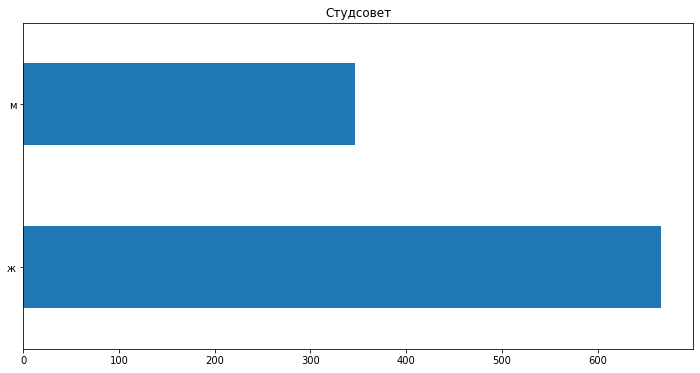

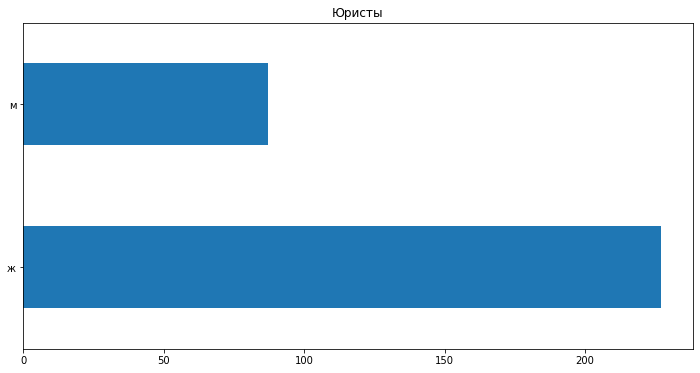

In [ ]:
df['sex'] = df['sex'].apply(lambda x: 'м' if x == 2 else 'ж')
df1['sex'] = df1['sex'].apply(lambda x: 'м' if x == 2 else 'ж')

plt.title('Студсовет')
df['sex'].value_counts().plot(kind='barh', figsize=(12, 6));

plt.show()

plt.title('Юристы')
df1['sex'].value_counts().plot(kind='barh', figsize=(12, 6));

plt.show()


In [ ]:
print('Кол-во пересечений:')
print(len(list(set(df['id']) & set(df1['id']))))

Кол-во пересечений:
59


In [ ]:
ids_inter = list(set(df['id']) & set(df1['id']))

In [ ]:
59/len(df1)

0.18789808917197454

In [ ]:
df[df.id.isin(ids_inter)]

,first_name,id,last_name,can_access_closed,is_closed,sex,has_mobile,city.id,city.title,country.title,country.id,bdate,mobile_phone,home_phone,deactivated,year
17,Ilya,8156991,Demin,True,False,м,1.0,110.0,Perm,Russia,1.0,11.3,NaN,8(342)233-83-07,NaN,None
20,Nikita,9444244,Klyuev,True,False,м,1.0,110.0,Perm,Russia,1.0,22.4.1991,NaN,NaN,NaN,1991
25,Veronika,12279354,Sergeeva,False,True,ж,1.0,110.0,Perm,Russia,1.0,NaN,NaN,NaN,NaN,NaN
37,Dasha,17748325,Lekomtseva,False,True,ж,1.0,110.0,Perm,Russia,1.0,13.6,NaN,NaN,NaN,None
43,Maxim,24359365,Kurganov,True,False,м,1.0,110.0,Perm,Russia,1.0,21.7,NaN,NaN,NaN,None
59,Denis,34389212,Kochetov,True,False,м,1.0,110.0,Perm,Russia,1.0,NaN,NaN,NaN,NaN,NaN
73,Tanya,41117491,Zagaynova,False,True,ж,1.0,110.0,Perm,Russia,1.0,23.8,NaN,NaN,NaN,None
77,Polina,45470614,Shevyrina,True,False,ж,1.0,49.0,Yekaterinburg,Russia,1.0,9.8,NaN,NaN,NaN,None
98,Tikhon,56005968,Grigoryevykh,True,False,м,1.0,110.0,Perm,Russia,1.0,19.9,NaN,NaN,NaN,None
105,Veronika,59662978,Avliarova,False,True,ж,1.0,110.0,Perm,Russia,1.0,2.5.1997,NaN,NaN,NaN,1997


In [ ]:
first = vk_api.friends.get(user_id=245099122, v=5.92, access_token=access_token)  
second = vk_api.friends.get(user_id=681368, v=5.92, access_token=access_token)  

In [ ]:
kurganov = pd.DataFrame()
kurganov['friends'] = first['items']
kurganov['person'] = "Курганов"
kurganov

,friends,person
0,2086622,Курганов
1,2887415,Курганов
2,2952229,Курганов
3,2968075,Курганов
4,10423452,Курганов
...,...,...
192,539897011,Курганов
193,540542774,Курганов
194,549681700,Курганов
195,606727058,Курганов


In [ ]:
gagarina = pd.DataFrame()
gagarina['friends'] = second['items']
gagarina['person'] = "Гагарина"

In [ ]:
gagarina

,friends,person
0,905,Гагарина
1,14162,Гагарина
2,15161,Гагарина
3,16227,Гагарина
4,20875,Гагарина
...,...,...
2202,666987068,Гагарина
2203,667080420,Гагарина
2204,672022038,Гагарина
2205,675837943,Гагарина


In [ ]:
data = kurganov.append(gagarina)

In [ ]:
result = data[(data['friends'].isin(gagarina['friends'])) & ((data['friends'].isin(kurganov['friends'])))]

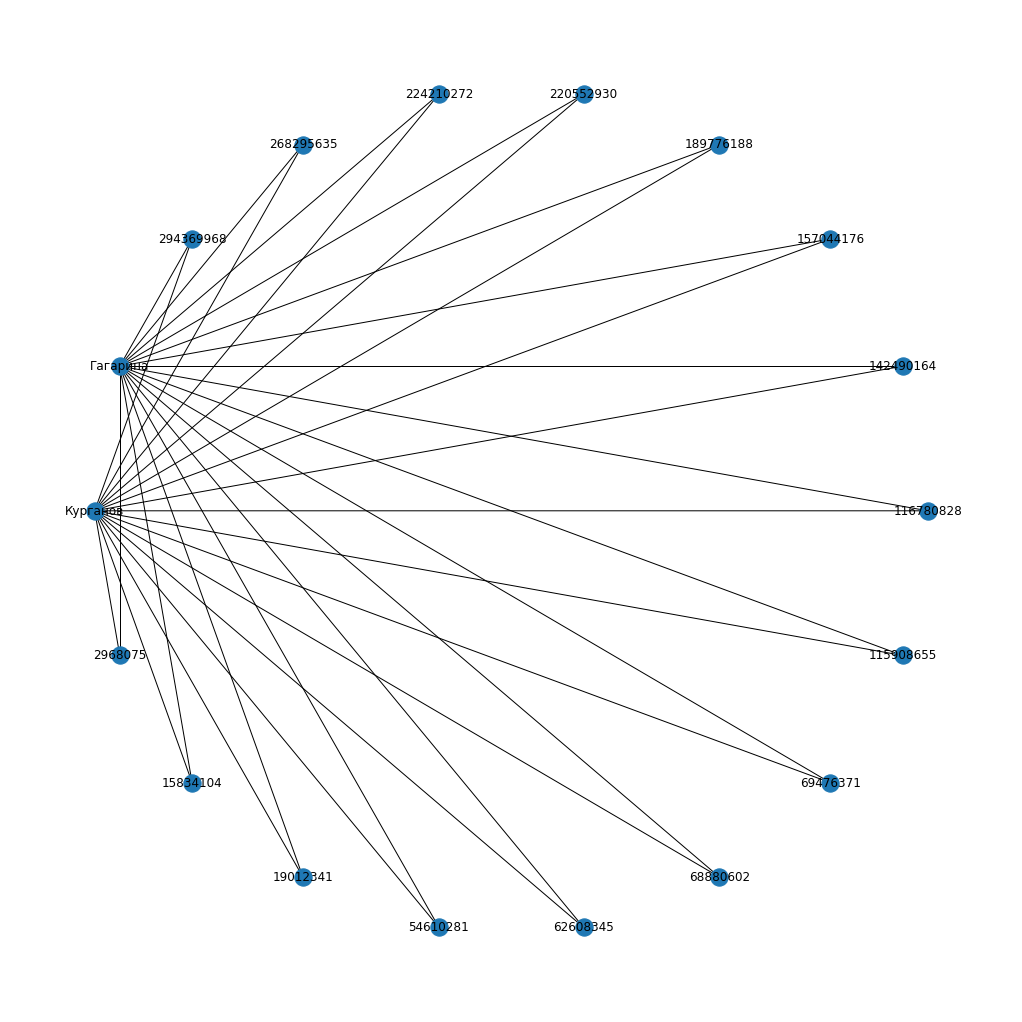

In [ ]:
import networkx as nx
from matplotlib.pyplot import figure

G = nx.Graph()
G = nx.from_pandas_edgelist(result, 'person', 'friends')
figure(figsize=(14, 14))
nx.draw_shell(G, with_labels=True)

In [ ]:
friend_list = list(result['friends'])

In [ ]:
def get_friends(id):
  first = vk_api.friends.get(user_id=id, v=5.92, access_token=access_token)  
  df = pd.DataFrame()
  df['friends'] = first['items']
  df['person'] = id
  df = df[df['friends'].isin(friend_list)]
  return df

In [ ]:
for friend in friend_list:
  try:
    result = result.append(get_friends(friend))
  except:
    print(f"{friend} is private")

68880602 is private
157044176 is private
189776188 is private
15834104 is private
68880602 is private
115908655 is private
116780828 is private
268295635 is private


In [ ]:
result

,friends,person
3,2968075,Курганов
8,15834104,Курганов
11,19012341,Курганов
25,54610281,Курганов
29,62608345,Курганов
...,...,...
72,115908655,294369968
73,116780828,294369968
108,142490164,294369968
183,220552930,294369968


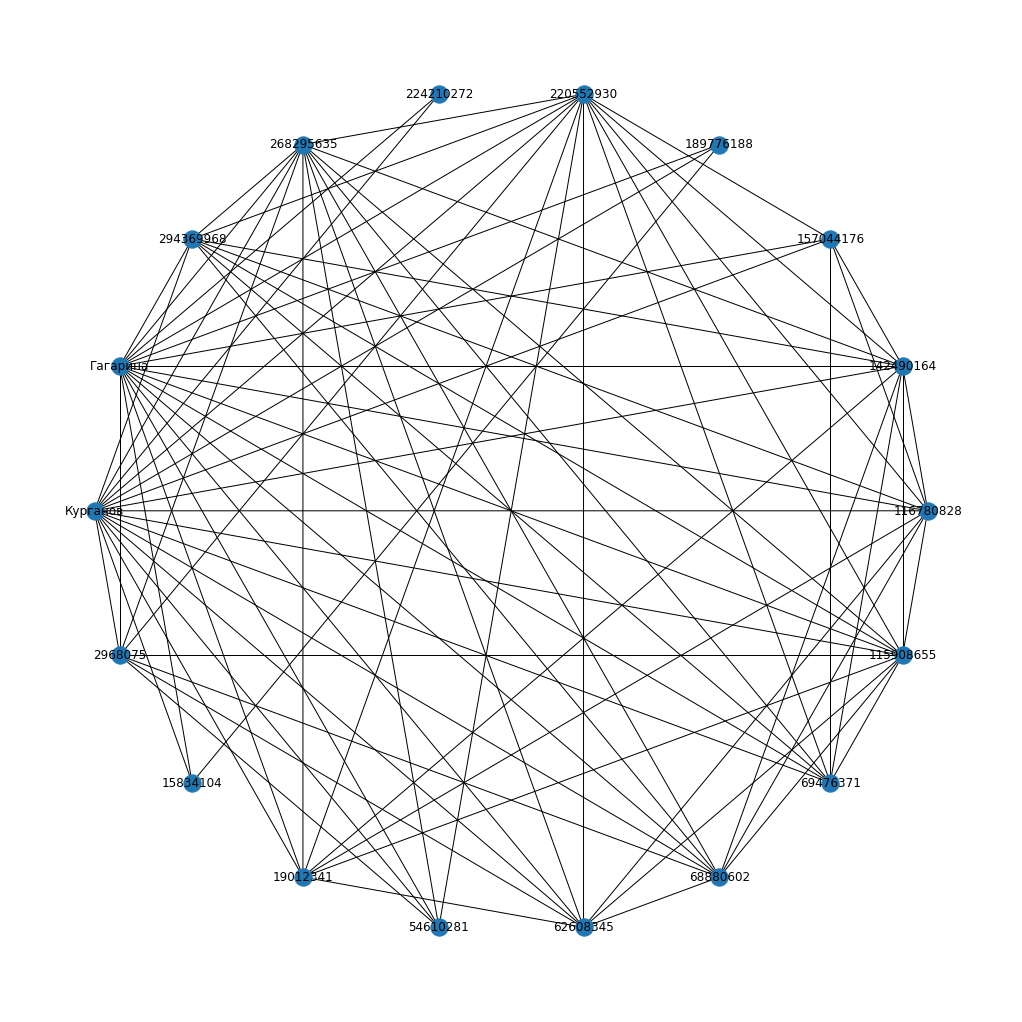

In [ ]:
G = nx.Graph()
G = nx.from_pandas_edgelist(result, 'person', 'friends')
figure(figsize=(14, 14))
nx.draw_shell(G, with_labels=True)